In [11]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from pathlib import Path
import random
from PIL import Image
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
dir_path = Path("data")
train_dir = dir_path /"train"
test_dir= dir_path /"test"

In [9]:
images = list(dir_path.glob("**/*.jpg"))
images[:10]

[WindowsPath('data/test/glioma/Te-glTr_0000.jpg'),
 WindowsPath('data/test/glioma/Te-glTr_0001.jpg'),
 WindowsPath('data/test/glioma/Te-glTr_0002.jpg'),
 WindowsPath('data/test/glioma/Te-glTr_0003.jpg'),
 WindowsPath('data/test/glioma/Te-glTr_0004.jpg'),
 WindowsPath('data/test/glioma/Te-glTr_0005.jpg'),
 WindowsPath('data/test/glioma/Te-glTr_0006.jpg'),
 WindowsPath('data/test/glioma/Te-glTr_0007.jpg'),
 WindowsPath('data/test/glioma/Te-glTr_0008.jpg'),
 WindowsPath('data/test/glioma/Te-glTr_0009.jpg')]

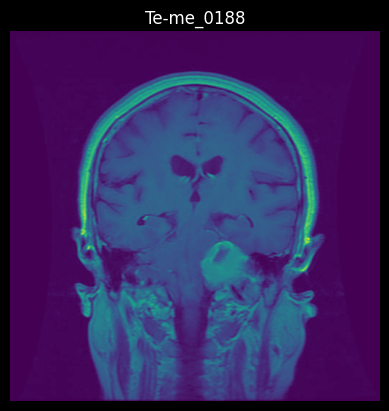

In [12]:
random_image = random.choice(images)
title = random_image.stem
img = Image.open(random_image)
plt.figure(facecolor="black")
plt.imshow(img)
plt.title(title, color="white")
plt.axis("off")
plt.show()

In [13]:
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(31),
    transforms.ToTensor(),]
    )

In [ ]:
import torchvision.models as models
model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(model.fc.in_features, 4)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

